## Download and prepare the dataset

In [1]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random
import tensorflow.python.keras as k
random.set_seed(1024)

def random_normal_init(shape, dtype=None):
    return random.normal(shape, dtype="float32")

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images[:20000].reshape((20000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels[:20000])
test_labels = to_categorical(test_labels)

2023-07-18 16:59:01.730719: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/count
2023-07-18 16:59:01.730798: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/count
2023-07-18 16:59:01.730805: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/api
2023-07-18 16:59:01.730808: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/api


## Download and prepare the dataset

In [2]:

from tensorflow.python.keras import layers
from tensorflow.python.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init))

2023-07-18 16:59:02.953518: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let's display the architecture of our convnet so far:

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

In [4]:
earlystop_callback = k.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

model.compile(optimizer='adam',
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [5]:
history = model.fit(train_images,
                    train_labels,
                    epochs=25,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[earlystop_callback])

2023-07-18 16:59:03.495173: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:164] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
141/141 [==============================] - 4s 28ms/step - loss: 560.3066 - accuracy: 0.2144 - val_loss: 187.0206 - val_accuracy: 0.3835
Epoch 2/25
141/141 [==============================] - 4s 31ms/step - loss: 135.4002 - accuracy: 0.4793 - val_loss: 98.2151 - val_accuracy: 0.5735
Epoch 3/25
141/141 [==============================] - 4s 28ms/step - loss: 84.3679 - accuracy: 0.6071 - val_loss: 66.5985 - val_accuracy: 0.6620
Epoch 4/25
141/141 [==============================] - 4s 27ms/step - loss: 62.0070 - accuracy: 0.6781 - val_loss: 51.7075 - val_accuracy: 0.7195
Epoch 5/25
141/141 [==============================] - 4s 27ms/step - loss: 49.4057 - accuracy: 0.7220 - val_loss: 41.2285 - val_accuracy: 0.7490
Epoch 6/25
141/141 [==============================] - 4s 29ms/step - loss: 40.7000 - accuracy: 0.7543 - val_loss: 35.8716 - val_accuracy: 0.7680
Epoch 7/25
141/141 [==============================] - 4s 26ms/step - loss: 34.1689 - accuracy: 0.7801 - val_loss: 30.5987 - val

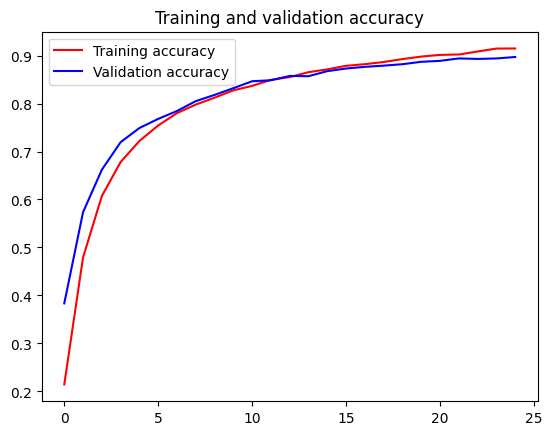

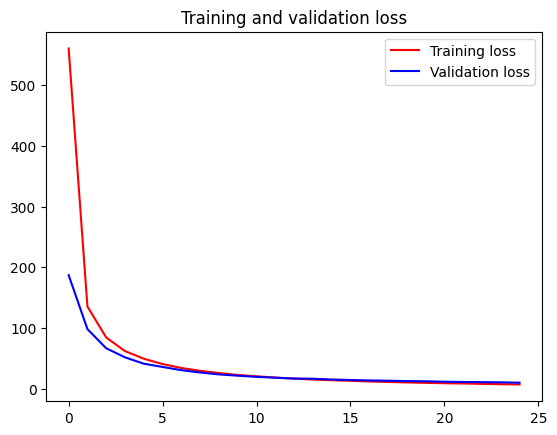

In [6]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 11.9982 - accuracy: 0.8863


In [8]:
test_acc

0.8863000273704529

In [9]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
first_layer_weights

array([[[[ 7.19385087e-01,  1.40303075e+00,  1.50696111e+00,
          -1.00167549e+00, -1.24212369e-01,  1.05334568e+00,
           9.43898737e-01,  8.61184120e-01,  1.69556296e+00,
          -1.55803680e-01,  9.16856647e-01, -8.07768524e-01,
          -4.69029807e-02, -2.78926253e+00, -1.13820386e+00,
          -3.50800365e-01,  1.08276391e+00, -6.29221201e-01,
           1.98372424e+00,  6.96482480e-01,  9.32695091e-01,
          -1.28880703e+00, -2.66633136e-03,  8.32228959e-01,
          -1.70636237e+00,  3.88125837e-01,  3.60180587e-01,
           5.93720853e-01, -1.11534975e-01, -5.20993769e-01,
          -1.09926724e+00, -3.33053380e-01]],

        [[-1.38583100e+00, -2.54418612e-01, -6.53467894e-01,
           5.29594183e-01,  3.30971688e-01, -2.50595808e-01,
          -1.43738484e+00,  9.55823064e-01, -1.92209935e+00,
           1.27228904e+00,  1.02117908e+00, -1.60746944e+00,
           9.00272608e-01,  1.02167261e+00, -3.42277199e-01,
           6.77227855e-01,  8.93125474

In [10]:
prediction = model.predict(train_images[:1])
print("prediction shape:", prediction.shape)
prediction

prediction shape: (1, 10)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)